# Import Libs

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import stats
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# Pre-task execution

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3]:
# Types of variables
for t in df.dtypes.unique():
    print('Type: {}\n{}\n'.format(t, df.dtypes[df.dtypes==t].index.values))

Type: int64
['age' 'duration' 'campaign' 'pdays' 'previous']

Type: object
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'day_of_week' 'poutcome' 'y']

Type: float64
['emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed']



In [4]:
missing = (df.isna().sum() / len(df)) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing = pd.DataFrame({'Percent of missing values' : missing})
missing

,Percent of missing values


In [5]:
for i in df:
    print(df[i].value_counts())

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no         33950
yes   

# Data analysis:

There is no null variables in the data set => it shouldn't make any pre-task execution

**Age** column can be representative (full data)
**Job** column can be representative (almost full data, only 330/41188 unknown)
**Marital** column can be representative (almost full data, only 80/41188 unknown)
**Education** column can be representative (almost full data, only 1731/41188 unknown)
**Default** column can **NOT** be representative (8597/41188 is unknown and a lot of 'no' answers)
**Housing** column can be representative (almost full data, only 990/41188 unknown)
**Loan** column can be representative (almost full data, only 990/41188 unknown)
**Contact** column can be representative (full data)
**Month** column can **NOT** be representative (full data, however this column can show us only the date)
**Day of week** column can **NOT** be representative (full data, however this column can show us only the date)
**Duration** column can be representative (full data)
**Campaign** column can be representative (full data)
**pdays** column can  be representative (full data)
**previous** column can be representative (full data)
**poutcome** column can be representative (full data)
**emp.var.rate** column can be representative (full data)
**cons.price.idx** column can be representative (full data)
**cons.conf.idx** column can be representative (full data)
**euribor3m** column can be representative (full data)
**nr.employed** column can be representative (full data)
**y** is our dependent variable (full data)

All in all, we exclude 3 variable (Default, month, day of week). Others variable are still can be representative. We need to choose variables, which show us the most representative information. Let's create a graph for each variable with dependent variable

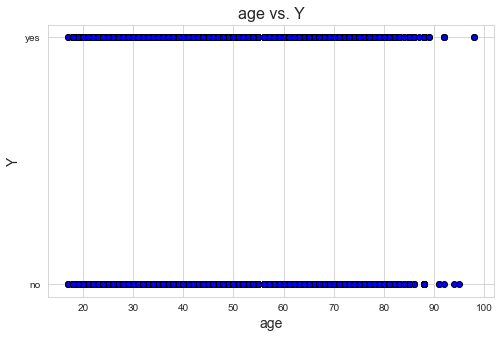

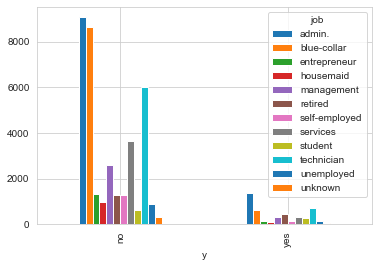

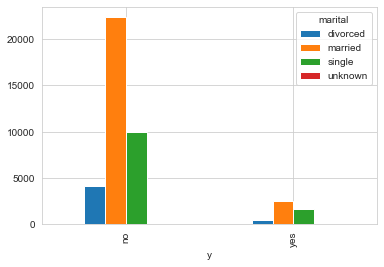

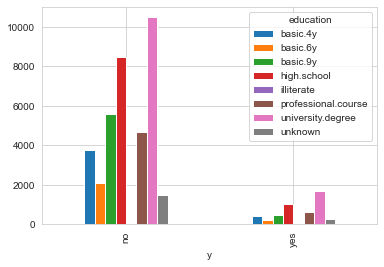

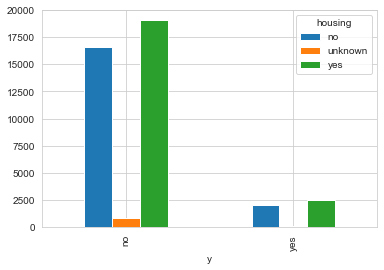

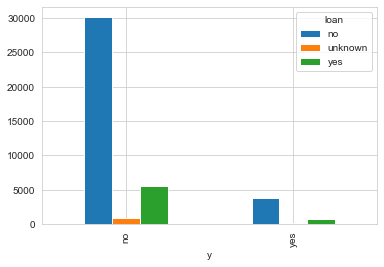

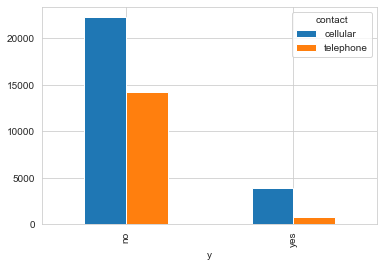

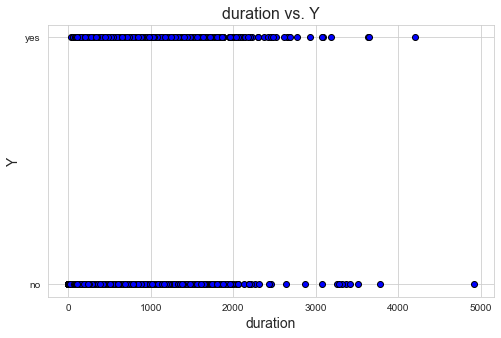

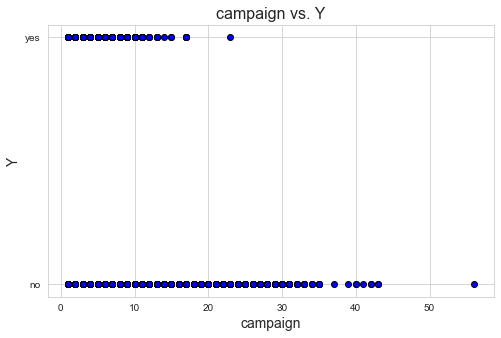

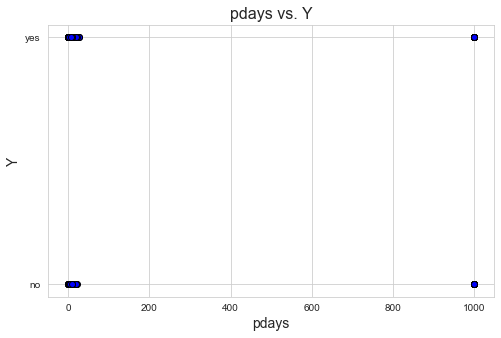

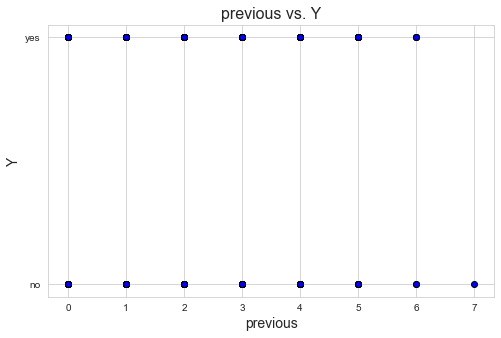

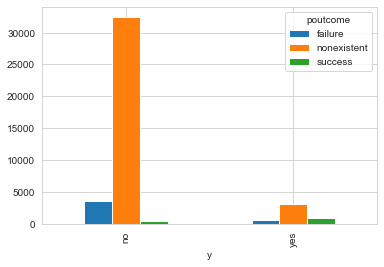

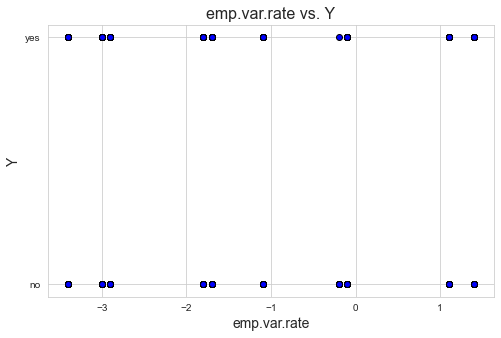

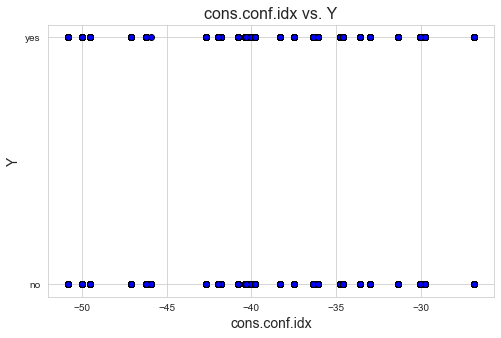

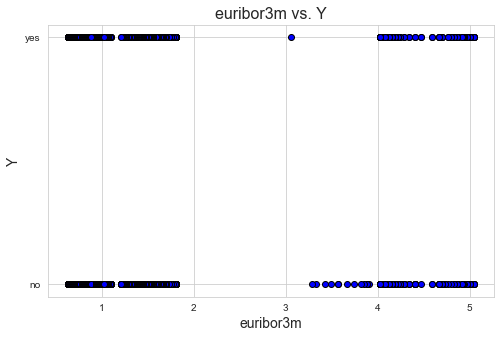

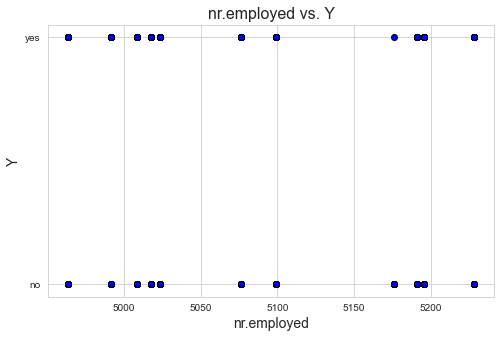

In [6]:
num = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.prive.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome']

for c in df.columns[0:]:
    if c in num:
        plt.figure(figsize=(8,5))
        plt.title('{} vs. Y'.format(c), fontsize=16)
        plt.scatter(x=df[c], y=df.y, color='blue',edgecolor='k')
        plt.grid(True)
        plt.xlabel(c, fontsize=14)
        plt.ylabel('Y', fontsize=14)
        plt.show()
    elif c in cat:
        ct = pd.crosstab(df.y, df[c])
        ct.plot.bar()

## Conclusion of data analysis

There is no relation between **Age** and **Y** (the difference only after 90+)
There is some relation between **Job** and **Y**
There is some relation between **Marital** and **Y**
There is no relation between **Education** and **Y**
There is no relation between **Housing** and **Y**
There is no relation between **Loan** and **Y**
There is some relation between **Contact** and **Y**
There is some relation between **Duration** and **Y**
There is some relation between **Campaign** and **Y**
There is no relation between **pdays** and **Y**
There is weak relation between **Previous** and **Y**
There is some relation between **Poutcome** and **Y**
There is no relation between variables **emp.var.rate**, **cons.price.idx**, **cons.conf.idx**,**nr.employed** and **Y**
There is some relation between **euribor3m** and **Y**

Predictors:
- Job
- Marital
- Contact
- Duration
- Previous
- Campaign
- Poutcome
- Euribor3m

In [7]:
df_cl = df.drop(['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed','education','housing','loan','default','month','day_of_week','pdays'], 1)
df_cl

/var/folders/gw/g8w_bwb12xxgph526gfvlplr0000gn/T/ipykernel_31284/3428409131.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_cl = df.drop(['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed','education','housing','loan','default','month','day_of_week','pdays'], 1)


,job,marital,contact,duration,campaign,previous,poutcome,euribor3m,y
0,housemaid,married,telephone,261,1,0,nonexistent,4.857,no
1,services,married,telephone,149,1,0,nonexistent,4.857,no
2,services,married,telephone,226,1,0,nonexistent,4.857,no
3,admin.,married,telephone,151,1,0,nonexistent,4.857,no
4,services,married,telephone,307,1,0,nonexistent,4.857,no
...,...,...,...,...,...,...,...,...,...
41183,retired,married,cellular,334,1,0,nonexistent,1.028,yes
41184,blue-collar,married,cellular,383,1,0,nonexistent,1.028,no
41185,retired,married,cellular,189,2,0,nonexistent,1.028,no
41186,technician,married,cellular,442,1,0,nonexistent,1.028,yes


In [8]:
df_dm = pd.get_dummies(df_cl, columns=['job','marital','contact','poutcome'])
df_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   duration              41188 non-null  int64  
 1   campaign              41188 non-null  int64  
 2   previous              41188 non-null  int64  
 3   euribor3m             41188 non-null  float64
 4   y                     41188 non-null  object 
 5   job_admin.            41188 non-null  uint8  
 6   job_blue-collar       41188 non-null  uint8  
 7   job_entrepreneur      41188 non-null  uint8  
 8   job_housemaid         41188 non-null  uint8  
 9   job_management        41188 non-null  uint8  
 10  job_retired           41188 non-null  uint8  
 11  job_self-employed     41188 non-null  uint8  
 12  job_services          41188 non-null  uint8  
 13  job_student           41188 non-null  uint8  
 14  job_technician        41188 non-null  uint8  
 15  job_unemployed     

# Regression

H0: The linear regression model constructed for a dependent variable 'Y' and the following predictors:
- Job
- Marital
- Contact
- Duration
- Campaign
- Previous
- Poutcome
- Euribor3m

explains the variation of 'Y'.

H1: The aforementioned model does not explain the variation of 'Y'.

p-value = 0.05.

In [9]:
df_reg = df_dm.drop(['job_unknown','marital_unknown','contact_telephone','poutcome_nonexistent'], 1)

/var/folders/gw/g8w_bwb12xxgph526gfvlplr0000gn/T/ipykernel_31284/3105165262.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_reg = df_dm.drop(['job_unknown','marital_unknown','contact_telephone','poutcome_nonexistent'], 1)


In [10]:
df_predictors = df_reg.drop('y',1)
df_dependent = df_reg['y']
df_dependent.replace(('yes','no'),(1,0),inplace=True) #Yes/no have to be parsed to 1/0

/var/folders/gw/g8w_bwb12xxgph526gfvlplr0000gn/T/ipykernel_31284/545627269.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_predictors = df_reg.drop('y',1)


In [12]:
x_mult_constant = sm.add_constant(df_predictors)

/Users/zhdanov.vdm/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
model = sm.Logit(df_dependent, x_mult_constant).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.222914
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41166
Method:                           MLE   Df Model:                           21
Date:                Tue, 10 May 2022   Pseudo R-squ.:                  0.3668
Time:                        17:40:58   Log-Likelihood:                -9181.4
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9981      0.454     -4.401      0.000      -2.888      -1.108
duration

In [15]:
print('R^2 = {:f}'.format(model.prsquared))
print('Model significance = {:f}'.format(model.llr_pvalue))

R^2 = 0.366774
Model significance = 0.000000


##### Conclusion:

Model is statistically significant at p-value = 0.05 and explains 37% of variance of variable 'Y'. H1 is rejected at p-value = 0.05

#### Hypotheses:

- H0_1: The variable job is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_2: The variable marital is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_3: The variable contact is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_4: The variable duration is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_5: The variable campaign is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_6: The variable previous is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_7: The variable poutcome is statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H0_8: The variable euribor3m is statistically significant for the logistic regression model constructed for a dependent variable 'y'

- H1_1: The variable job is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_2: The variable marital is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_3: The variable contact is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_4: The variable duration is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_5: The variable campaign is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_6: The variable previous is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_7: The variable poutcome is not statistically significant for the logistic regression model constructed for a dependent variable 'y'
- H1_8: The variable euribor3m is not statistically significant for the logistic regression model constructed for a dependent variable 'y'

p-value = 0.05

In [16]:
print(f'Statistically significant model parameters: {model.pvalues[model.pvalues < 0.05].index.values}')

Statistically significant model parameters: ['const' 'duration' 'campaign' 'previous' 'euribor3m' 'job_blue-collar'
 'job_retired' 'job_services' 'contact_cellular' 'poutcome_failure'
 'poutcome_success']


In [17]:
print(f'Statistically nonsignificant model parameters: {model.pvalues[model.pvalues > 0.05].index.values}')

Statistically nonsignificant model parameters: ['job_admin.' 'job_entrepreneur' 'job_housemaid' 'job_management'
 'job_self-employed' 'job_student' 'job_technician' 'job_unemployed'
 'marital_divorced' 'marital_married' 'marital_single']


## Conclusion:

Duration, campaign, previous, euribor3m, job (partially), contact and poutcome are statistically significant. Thus, H1_2 is accepted at p-value = 0.05, H1_1, H1_3, H1_4, H1_5, H1_6, H1_7 and H1_8 are rejected.

# Regression equation

In [18]:
l = []
for (param, index) in zip(model.params[1:], model.params.index[1:]):
    l.append('{:.2f}*{}'.format(param, index))

print('logit(p) = {:2f} + {}'.format(model.params[0], ' + '.join(l)))

logit(p) = -1.998094 + 0.00*duration + -0.05*campaign + 0.30*previous + -0.56*euribor3m + -0.04*job_admin. + -0.75*job_blue-collar + -0.44*job_entrepreneur + -0.09*job_housemaid + -0.13*job_management + 0.50*job_retired + -0.23*job_self-employed + -0.52*job_services + 0.27*job_student + -0.12*job_technician + 0.01*job_unemployed + 0.00*marital_divorced + 0.02*marital_married + 0.13*marital_single + 0.27*contact_cellular + -0.78*poutcome_failure + 1.34*poutcome_success


# Coefs

In [19]:
coefs = pd.DataFrame()
coefs['Coefs'] = model.params[1:]
coefs['Features'] = model.params.index[1:]
coefs.set_index('Features', inplace=True)
print('Intercept = ', model.params[0])
coefs

Intercept =  -1.998094108551784


,Coefs
Features,
duration,0.004514
campaign,-0.051817
previous,0.296664
euribor3m,-0.563277
job_admin.,-0.042991
job_blue-collar,-0.753511
job_entrepreneur,-0.442676
job_housemaid,-0.086330
job_management,-0.134755


In [22]:
coefs['OddsRatio'] = np.exp(coefs.Coefs)
coefs

,Coefs,OddsRatio
Features,,
duration,0.004514,1.004524
campaign,-0.051817,0.949503
previous,0.296664,1.345363
euribor3m,-0.563277,0.569340
job_admin.,-0.042991,0.957920
job_blue-collar,-0.753511,0.470711
job_entrepreneur,-0.442676,0.642315
job_housemaid,-0.086330,0.917292
job_management,-0.134755,0.873930


Statistically significant model parameters: ['duration' 'campaign' 'previous' 'euribor3m' 'job_blue-collar'
 'job_retired' 'job_services' 'contact_cellular' 'poutcome_failure'
 'poutcome_success'].

Description for them (odds = odds to deposit subscription):

- Increase in duration by one => increase the odds by 0.4%
- Increase in campaign by one => decrease the odds by 5%
- Increase in previous by one => increase the odds by 35%
- Increase in euribor3m by one => decrease the odds by 43%
- Increase blue collar jobs by one => decrease the odds by 53%
- Increase retired job by one => increase the odds by 64%
- Increase service job by one => decrease the odds by 41%
- Increase contact cellular by one => increase the odds by 31%
- Increase failed outcome by one => decrease the odds by 54%
- Increase success outcome by one => increase the odds by 280%

# Confusion matrix

In [23]:
cm = model.pred_table()
cm

array([[35633.,   915.],
       [ 2900.,  1740.]])

In [24]:
print('TP: {} | FN: {}\n-------------------\nFP: {}  | TN: {}'.format(cm[0,0], cm[0,1], cm[1,0], cm[1,1]))

TP: 35633.0 | FN: 915.0
-------------------
FP: 2900.0  | TN: 1740.0


In [25]:
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.9073759347382733


Accuracy rate for the model is greater than 0.9 which means that models fits the data very well.

# ROC-curve

In [28]:
fpr, tpr, _ = roc_curve(df_dependent, model.predict())
roc_auc = auc(fpr, tpr)

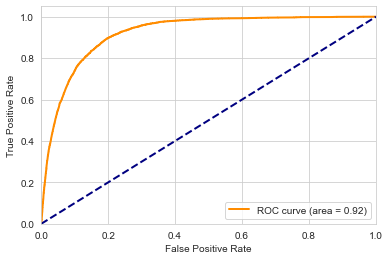

In [29]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

AUC equals to 0.92 which shows that the model fits the data very well

# Model Diagnostics

## Residuals

H1: The distribution of residuals is different from the normal distribution

H0: The distribution of residuals is not different from the normal distribution

p-value = 0.05

In [31]:
p = stats.kstest(model.resid_generalized, 'norm', args=(model.resid_generalized.mean(), model.resid_generalized.std())).pvalue
print('P-value: {:.3f}'.format(p))

P-value: 0.000


/Users/zhdanov.vdm/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

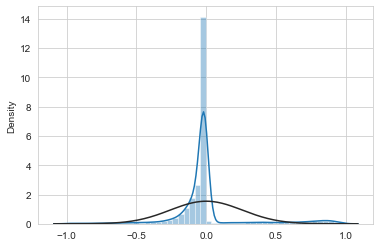

In [32]:
sns.distplot(model.resid_generalized, fit=stats.norm)

##### Conclusion:

H1 is accepted at p-value = 0.05 : residuals significantly differ from the normal distribution.

## Multicollinearity

Multicollinearity can be checked to find any strong correlations between predictors

In [34]:
vifs = np.array([vif(model.model.exog, i) for i in range(model.model.exog.shape[1])])

In [35]:
vif_df = pd.DataFrame()
vif_df['VIF'] = vifs[1:]
vif_df['Features'] = model.params.index[1:]
vif_df.sort_values(by=['VIF'])

,VIF,Features
0,1.008783,duration
1,1.025271,campaign
18,1.214701,contact_cellular
3,1.548186,euribor3m
20,2.632202,poutcome_success
19,3.631560,poutcome_failure
12,3.667968,job_student
14,3.982859,job_unemployed
7,4.117375,job_housemaid
2,4.765811,previous


There is a multicollinearity problem since some groups of 'marital' and 'job' predictors have strong correlation with each other

## Saving probability of Y to the source dataframe:

In [36]:
df['probability'] = model.predict()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,probability
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.024692
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.009755
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.013753
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.015837
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0.019704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.416477
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.203111
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,0.260459
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,0.386230


# Final conclusion

The model shows a very high accuracy and AUC. Thus, the model fits the data very well (but lots of unknown, not null, data) and gives us possibility to predict **Y** variable. All in all, the model quite good, but describes only 37% of the **Y** variance